# Question 1
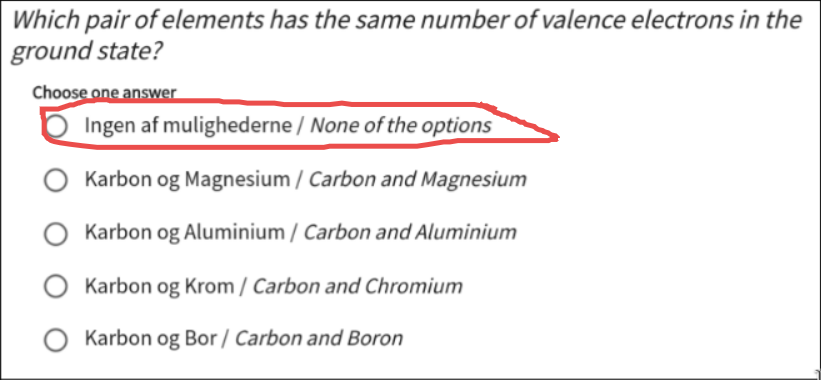

# Question 2
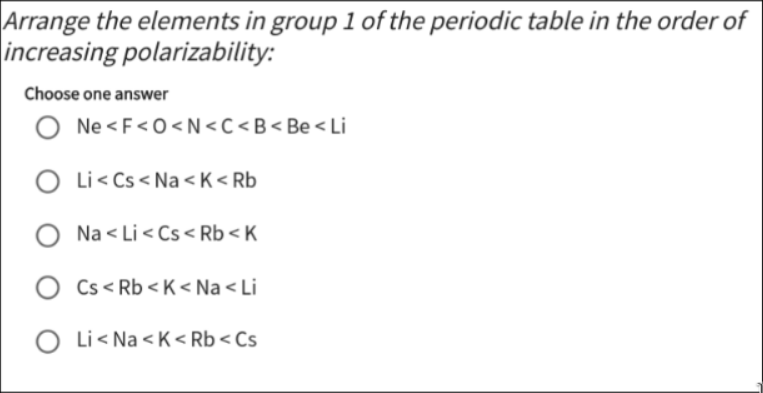

Polarizability is the measure of how easily an atom's electron cloud can be distorted by an external electric field. Think of it as how "squishy" the electron cloud is.

The key periodic trend for polarizability is:

    Polarizability increases as you go down a group.

# Question 3
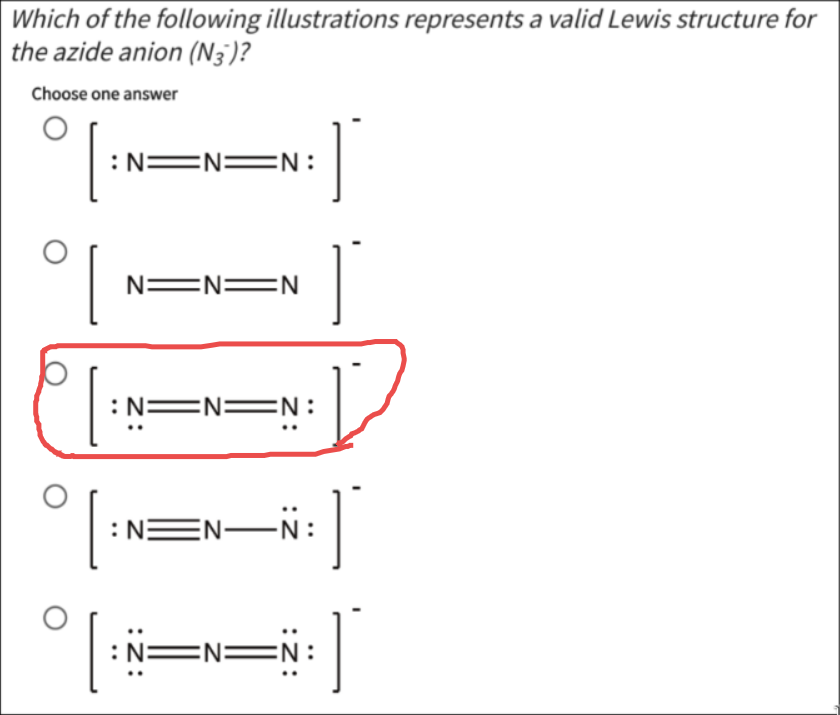

# Question 4
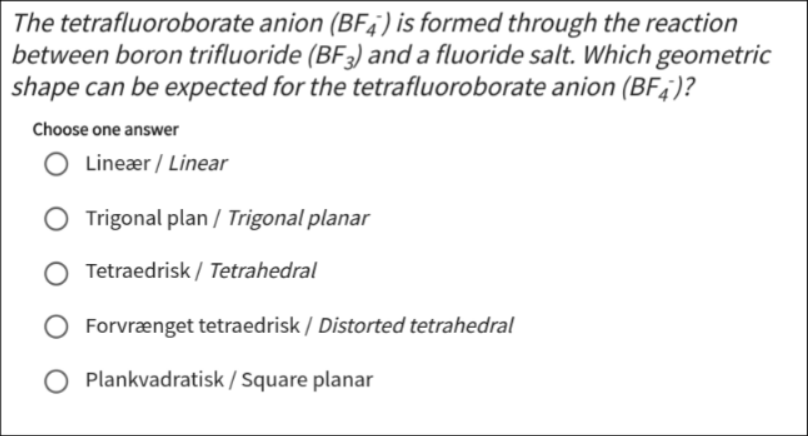

In [1]:
import molecular_structure as ms

print(ms.analyze_molecular_properties("BF4-"))

--- Analysis for BF4- ---
  - Central Atom: B
  - Bonding Pairs: 4 | Lone Pairs: 0
  - Electron Geometry: Tetrahedral
  - Molecular Geometry: Tetrahedral
  - Symmetry: Symmetrical
  - Bond Polarity: Polar Covalent
  - Polarity: Nonpolar
  - Max Bond ΔEN: 1.94


# Question 5
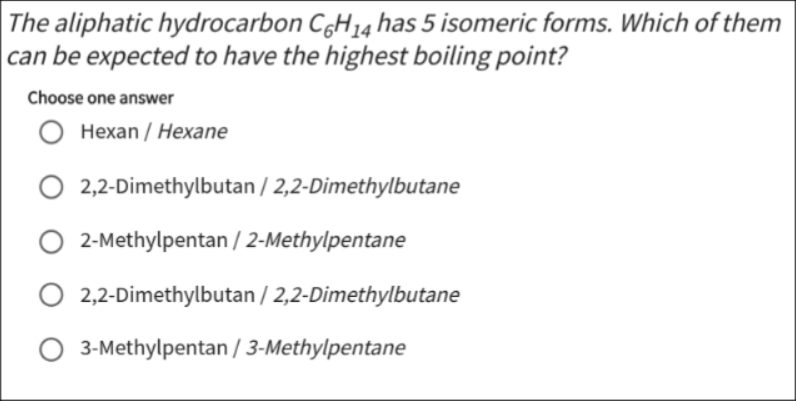

This question deals with the effect of molecular shape on the boiling points of isomers.

* Intermolecular Forces: All of the compounds are isomers of hexane (C6​H14​). As nonpolar hydrocarbons, the only intermolecular forces they experience are London dispersion forces. The strength of these forces determines the boiling point.
    * Effect of Branching: Since all isomers have the same molar mass, the difference in the strength of their London dispersion forces comes down to their surface area.

    * Straight-chain alkanes (like hexane) are long and have a large surface area, allowing for many points of contact with neighboring molecules. This leads to stronger dispersion forces.

    * Branched alkanes (like 2-methylpentane or 2,2-dimethylbutane) are more compact and spherical. This reduces their surface area, leading to fewer points of contact and weaker dispersion forces.

Conclusion: Stronger intermolecular forces require more energy (a higher temperature) to overcome. Therefore, the isomer with the least amount of branching will have the highest boiling point.

# Question 6
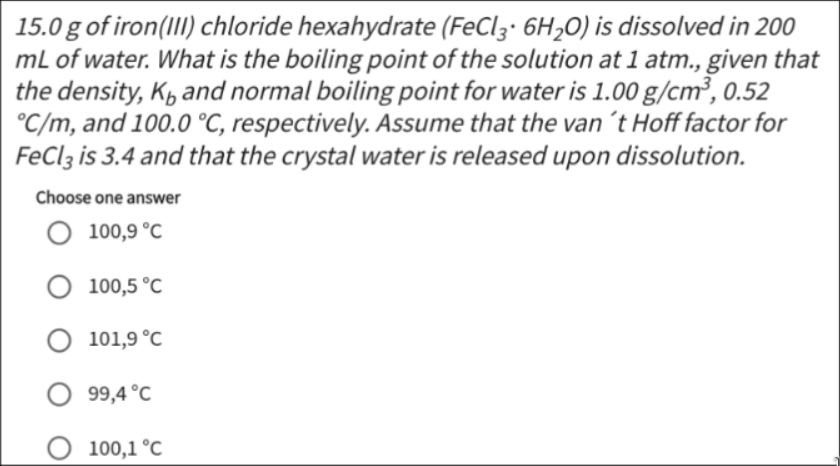

In [ ]:
import solutions as sol
from compound import Compound

# --- Given values ---
mass_hydrate_g = 15.0
initial_volume_water_mL = 200.0
density_water_g_mL = 1.00
Kb_water = 0.52
i_factor = 3.4 # van't Hoff factor for FeCl3
normal_bp_water = 100.0

# --- Step 1: Calculate Molality ---
# a. Moles of solute
fecl3_hydrate = Compound("FeCl3(H2O)6")
fecl3_hydrate.set_mass(mass_hydrate_g)
moles_solute = fecl3_hydrate.amount_mol

# b. Total mass of solvent in kg
water = Compound("H2O")
moles_water_from_hydrate = moles_solute * 6
mass_water_from_hydrate_g = moles_water_from_hydrate * water.molar_mass
initial_mass_water_g = initial_volume_water_mL * density_water_g_mL
total_mass_solvent_kg = (initial_mass_water_g + mass_water_from_hydrate_g) / 1000

# c. Molality
molality = sol.calculate_molality(moles_solute, total_mass_solvent_kg, solvent_unit='kg')

# --- Step 2: Calculate Boiling Point ---
delta_Tb = i_factor * Kb_water * molality
final_boiling_point = normal_bp_water + delta_Tb

print(f"Total mass of solvent: {total_mass_solvent_kg:.3f} kg")
print(f"Molality of the solution: {molality:.3f} m")
print(f"The final boiling point of the solution is: {final_boiling_point:.1f} °C")

Total mass of solvent: 0.206 kg
Molality of the solution: 0.269 m
The final boiling point of the solution is: 100.5 °C


# Question 7
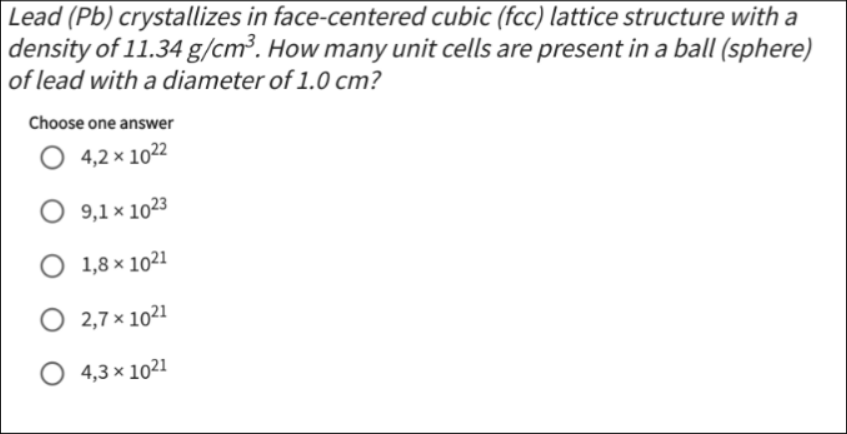

In [3]:
import math
import solid_state as ss

# --- Given values ---
element = "Pb"
density = 11.34  # g/cm³
diameter = 1.0   # cm
structure = "FCC"

# --- Step 1: Calculate the mass of the sphere ---
radius_cm = diameter / 2
volume_cm3 = (4/3) * math.pi * (radius_cm**3)
mass_g = volume_cm3 * density

# --- Step 2: Use the library function to find the number of unit cells ---
unit_cells = ss.calculate_unit_cells_from_mass(
    element_symbol=element,
    mass_g=mass_g,
    crystal_type=structure
)

print(f"The number of unit cells in the lead sphere is: {unit_cells:.1e}")

The number of unit cells in the lead sphere is: 4.3e+21


# Question 8
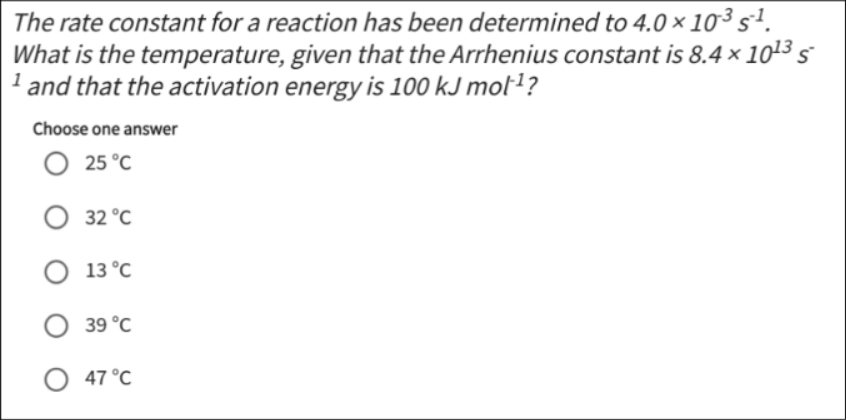

In [11]:
import kinetics as kin

# --- Given values ---
rate_constant = 4.0e-3
arrhenius_constant = 8.4e13
activation_energy = 100  # in kJ/mol

# --- Calculation ---
temp_K = kin.arrhenius_solve_for_T(
    k=rate_constant,
    A=arrhenius_constant,
    Ea_kJ_mol=activation_energy
)

# Convert Kelvin to Celsius
temp_C = temp_K - 273.15

# --- Display the result ---
print(f"The temperature is: {temp_C:.0f} °C")

The temperature is: 47 °C


# Question 9
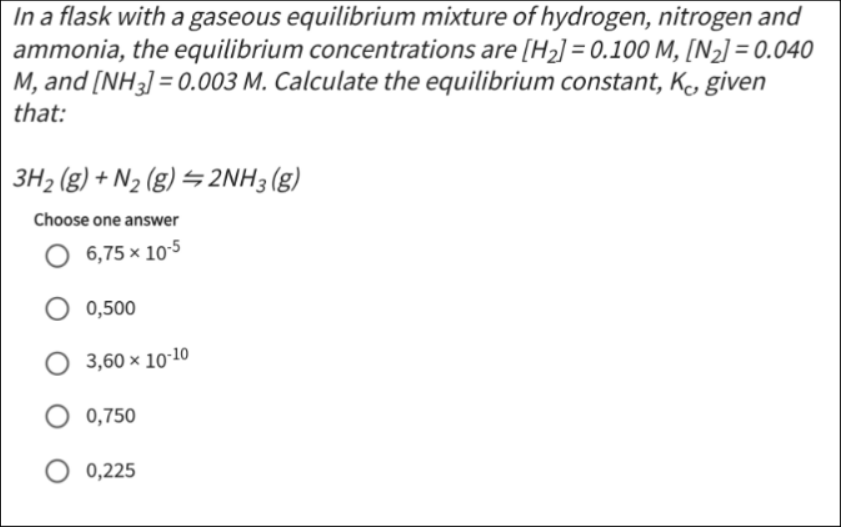

In [6]:
from equations import ChemicalEquation
import equilibrium as eq

# --- 1. Define the compounds and the reaction ---
H2 = Compound("H2")
N2 = Compound("N2")
NH3 = Compound("NH3")

reaction = ChemicalEquation(reactants=[H2, N2], products=[NH3])

# --- 2. Define the dictionary of equilibrium concentrations ---
concentrations = {
    H2: 0.1, # M
    N2: 0.04, # M
    NH3: 0.003 # M
}

# --- 3. Calculation ---
kc_value = eq.calculate_kc(reaction, concentrations)

print(f"The value of Kc is {kc_value:.3f}")

The value of Kc is 0.225


# Question 10
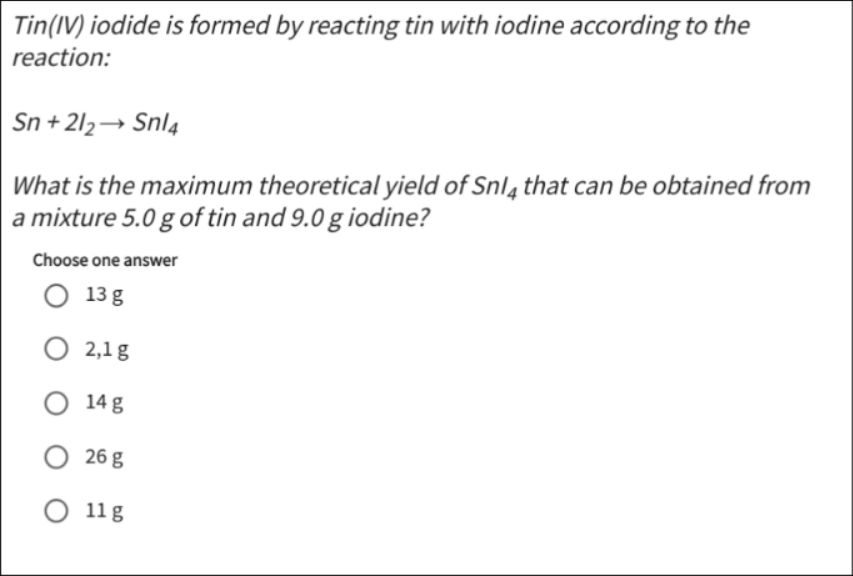

In [9]:
# --- 1. Define the compounds and their initial masses ---
sn = Compound("Sn"); sn.set_mass(5)
i2 = Compound("I2"); i2.set_mass(9)

sni4 = Compound("SnI4")

# --- 2. Create the chemical equation ---
reaction = ChemicalEquation(
    reactants=[sn, i2],
    products=[sni4]
)

# --- 3. Calculate the theoretical yield ---
# The function will automatically balance the equation and find the limiting reactant.
limiting_reagent, yields = reaction.theoretical_yield({
    sn: sn.amount_mol,
    i2: i2.amount_mol
})

# --- 4. Display the results ---
sni4_yield_grams = yields[sni4][1] # Get the mass in grams

print(f"The limiting reactant is: {limiting_reagent.name()}")
print(f"The maximum yield of SnI4 is: {sni4_yield_grams:.1f} g")


The limiting reactant is: Iodine (halogen)
The maximum yield of SnI4 is: 11.1 g


# Question 11
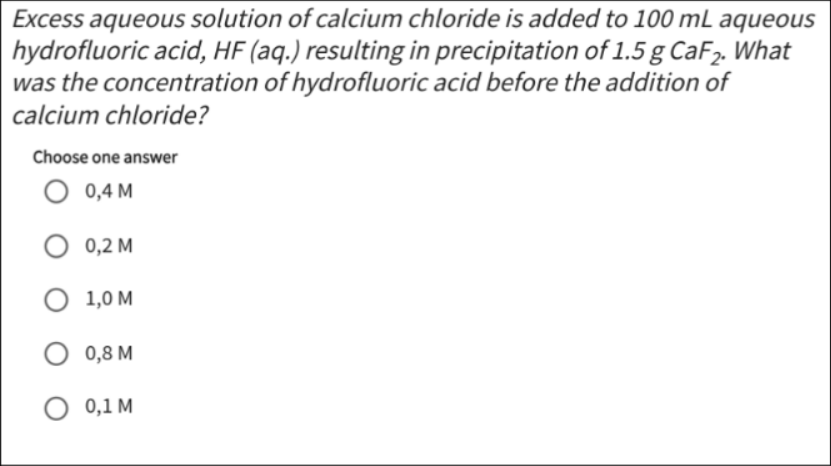

In [12]:
# --- Given values ---
mass_caf2_g = 1.5
volume_hf_L = 0.100 # 100 mL

# --- Step 1: Calculate moles of CaF2 produced ---
caf2 = Compound("CaF2")
caf2.set_mass(mass_caf2_g)
moles_caf2 = caf2.amount_mol

# --- Step 2: Use the balanced equation to find the mole ratio ---
# Create the equation to get the balanced coefficients
cacl2 = Compound("CaCl2")
hf = Compound("HF")
hcl = Compound("HCl")
reaction = ChemicalEquation(reactants=[cacl2, hf], products=[caf2, hcl])
r_coeffs, p_coeffs = reaction.balance() # Will be [1, 2] and [1, 2]

# Stoichiometric ratio of HF to CaF2 is r_coeffs[1] to p_coeffs[0]
moles_hf_reacted = moles_caf2 * (r_coeffs[1] / p_coeffs[0])

# --- Step 3: Calculate the initial concentration of HF ---
concentration_hf = moles_hf_reacted / volume_hf_L

print(f"The initial concentration of the HF solution was: {concentration_hf:.1f} M")

The initial concentration of the HF solution was: 0.4 M


# Question 12
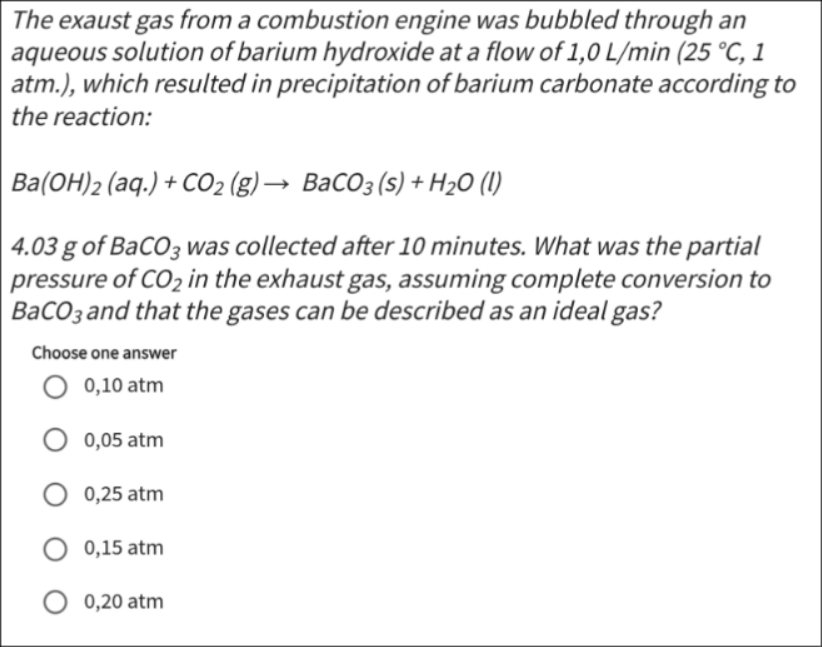

In [13]:
import gases

# --- Step 1: Calculate moles of CO2 from the precipitate ---
baco3 = Compound("BaCO3")
baco3.set_mass(4.03)
# From the 1:1 reaction stoichiometry, moles of CO2 = moles of BaCO3
moles_co2 = baco3.amount_mol

# --- Step 2: Calculate total moles of exhaust gas in 10 minutes ---
total_volume_L = 1.0 * 10 # L/min * min
total_moles_gas = gases.ideal_gas_moles(
    P=1.0,
    V=total_volume_L,
    T=25,
    p_unit='atm',
    T_unit='C'
)

# --- Step 3: Calculate mole fraction and partial pressure ---
mole_fraction_co2 = moles_co2 / total_moles_gas
total_pressure_atm = 1.0
partial_pressure_co2 = mole_fraction_co2 * total_pressure_atm

print(f"The partial pressure of CO2 was: {partial_pressure_co2:.2f} atm")


The partial pressure of CO2 was: 0.05 atm


# Question 13
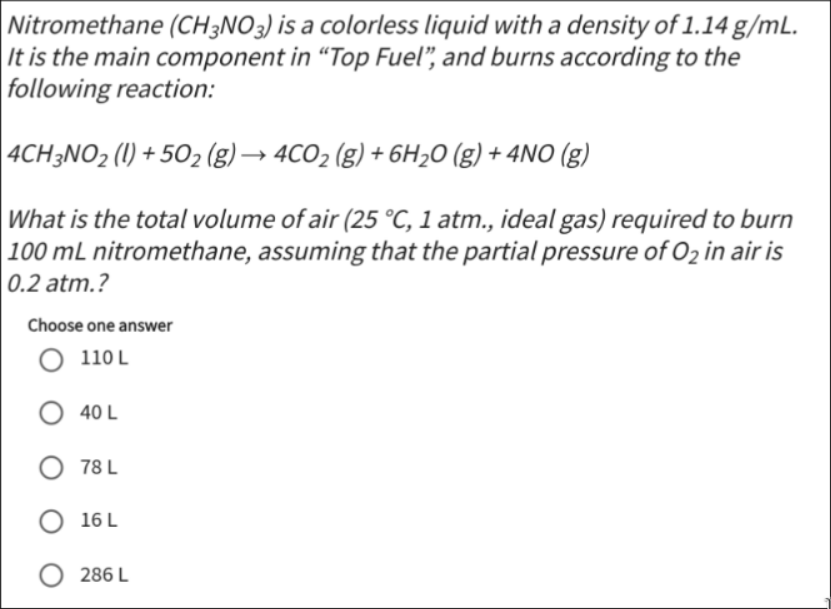

In [14]:
# --- Given values ---
volume_nitro_mL = 100.0
density_nitro_g_mL = 1.14
temp_C = 25
pressure_atm = 1.0
o2_mole_fraction_in_air = 0.2

# --- Step 1: Calculate moles of nitromethane ---
nitromethane = Compound("CH3NO2")
mass_nitro_g = volume_nitro_mL * density_nitro_g_mL
nitromethane.set_mass(mass_nitro_g)
moles_nitro = nitromethane.amount_mol

# --- Step 2: Calculate moles of O2 needed from stoichiometry ---
# Ratio is 5 moles O2 / 4 moles CH3NO2
moles_o2_needed = moles_nitro * (5 / 4)

# --- Step 3: Calculate total moles of air ---
moles_air = moles_o2_needed / o2_mole_fraction_in_air

# --- Step 4: Calculate the final volume of air ---
volume_air = gases.ideal_gas_volume(
    n=moles_air,
    T=temp_C,
    p=pressure_atm,
    T_unit='C',
    P_unit='atm'
)

print(f"The total volume of air required is: {volume_air:.0f} L")

The total volume of air required is: 286 L


# Question 14
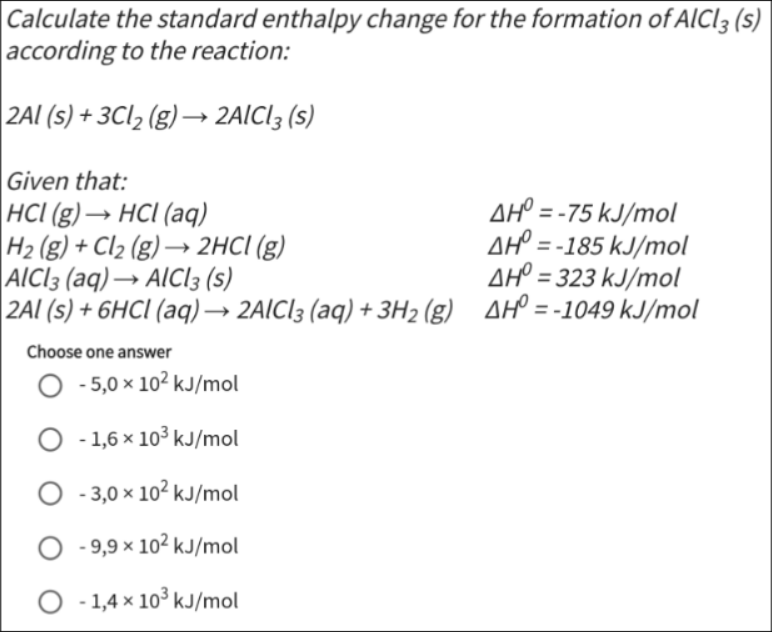

In [15]:
import energy

# --- Define the reactions as strings ---
target_reaction = "2Al(s) + 3Cl2(g) -> 2AlCl3(s)"

known_reactions = [
    "HCl(g) -> HCl(aq)",
    "H2(g) + Cl2(g) -> 2HCl(g)",
    "AlCl3(aq) -> AlCl3(s)",
    "2Al(s) + 6HCl(aq) -> 2AlCl3(aq) + 3H2(g)"
]

# --- Define the known enthalpy values ---
known_enthalpies = [-75, -185, 323, -1049]

# --- Calculation ---
total_enthalpy, multipliers = energy.solve_hess_law(
    target_reaction_str=target_reaction,
    known_reaction_strs=known_reactions,
    known_enthalpies=known_enthalpies
)

# --- Display the result ---
print(f"The standard enthalpy change for the reaction is: {total_enthalpy/1000:.1f} x 10^3 kJ/mol")

The standard enthalpy change for the reaction is: -1.4 x 10^3 kJ/mol


# Question 15
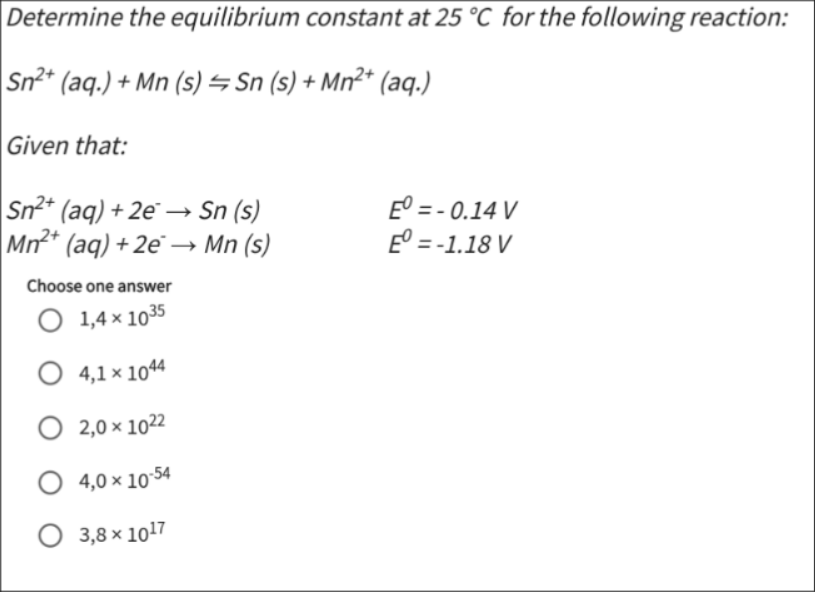

In [16]:
import electrochemistry as ec

# --- Given values from the problem ---
# The Sn2+/Sn pair is the cathode (reduction)
e_cathode_val = -0.14

# The Mn2+/Mn pair is the anode (oxidation)
e_anode_val = -1.18

# We determined that 2 electrons are transferred
n_val = 2

# --- Calculation ---
K_eq = ec.calculate_equilibrium_constant_from_potentials(
    E_cathode=e_cathode_val,
    E_anode=e_anode_val,
    n_electrons=n_val
)

# --- Display the result ---
print(f"The equilibrium constant K is: {K_eq:.1e}")


The equilibrium constant K is: 1.4e+35


# Question 16
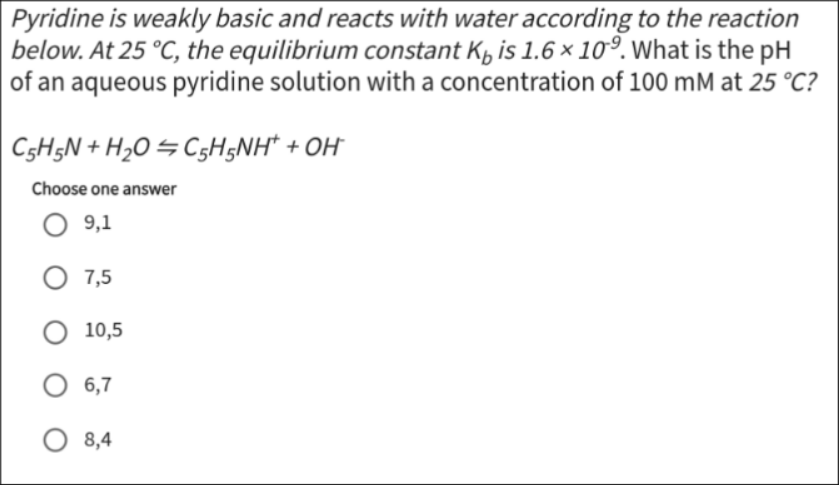

In [17]:
import acids_and_bases as ab

# --- Given values ---
Kb_pyridine = 1.6e-9
initial_conc_mM = 100

# --- Convert concentration to M ---
initial_conc_M = initial_conc_mM / 1000

# --- Calculation ---
# Use the library function to calculate pOH
pOH_value = ab.calculate_weak_base_pOH(initial_conc_M, Kb_pyridine)

# Use the library function to convert pOH to pH
pH_value = ab.convert_pOH_to_pH(pOH_value)

print(f"The pOH of the solution is: {pOH_value:.1f}")
print(f"The final pH of the solution is: {pH_value:.1f}")

The pOH of the solution is: 4.9
The final pH of the solution is: 9.1


# Question 17
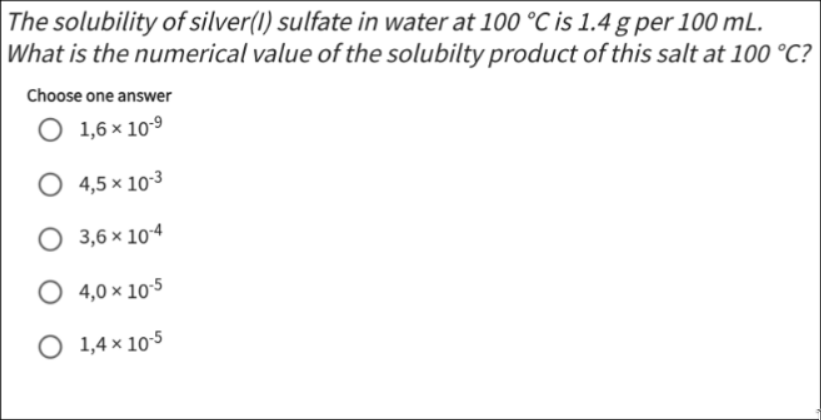

In [18]:
# --- Given values ---
formula = "Ag2SO4"
solubility_g_per_100mL = 1.4

# --- Convert solubility to g/L ---
solubility_g_per_L = solubility_g_per_100mL * 10

# --- Calculation ---
ksp_value = eq.calculate_ksp_from_solubility(formula, solubility_g_per_L)

print(f"The calculated Ksp for {formula} is {ksp_value:.1e}")

The calculated Ksp for Ag2SO4 is 3.6e-04


# Question 18
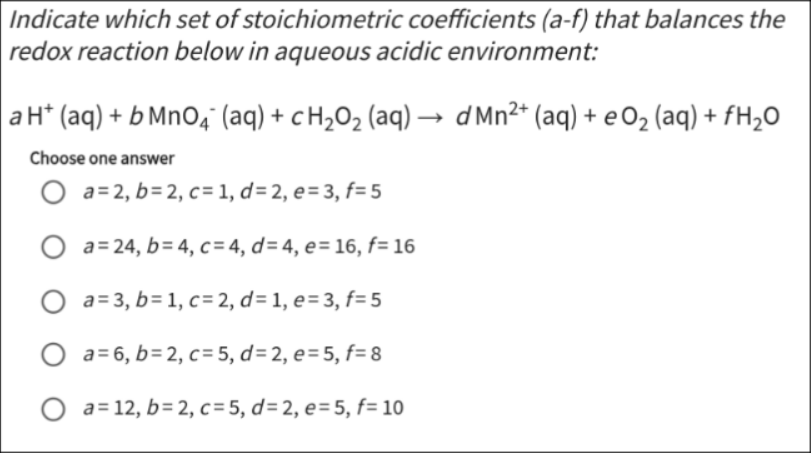

svar: `a = 6, b = 2, c = 5, d = 2, e = 5, f = 8`

# Question 19
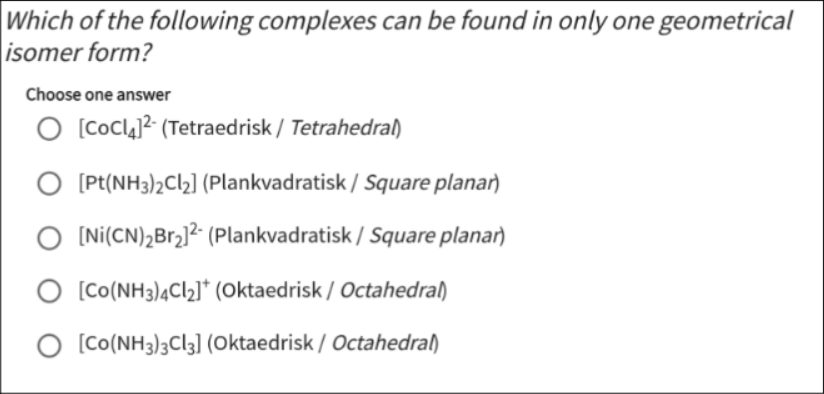

In [22]:
import materials

complexes_to_check = [
    "[CoCl4]2-",
    "[Pt(NH3)2Cl2]",
    "[Ni(CN)2Br2]2-",
    "[Co(NH3)4Cl2]+",
    "[Co(NH3)3Cl3]"
]

print("--- Geometrical Isomer Analysis ---")
for complex_formula in complexes_to_check:
    result = materials.predict_geometrical_isomers(complex_formula)
    print(f"{complex_formula:<15} -> {result}")

--- Geometrical Isomer Analysis ---
[CoCl4]2-       -> 1 form (Tetrahedral complexes do not have geometrical isomers)
[Pt(NH3)2Cl2]   -> 2 forms (cis and trans isomers)
[Ni(CN)2Br2]2-  -> 2 forms (cis and trans isomers)
[Co(NH3)4Cl2]+  -> 2 forms (cis and trans isomers)
[Co(NH3)3Cl3]   -> 2 forms (facial and meridional isomers)


# Question 20

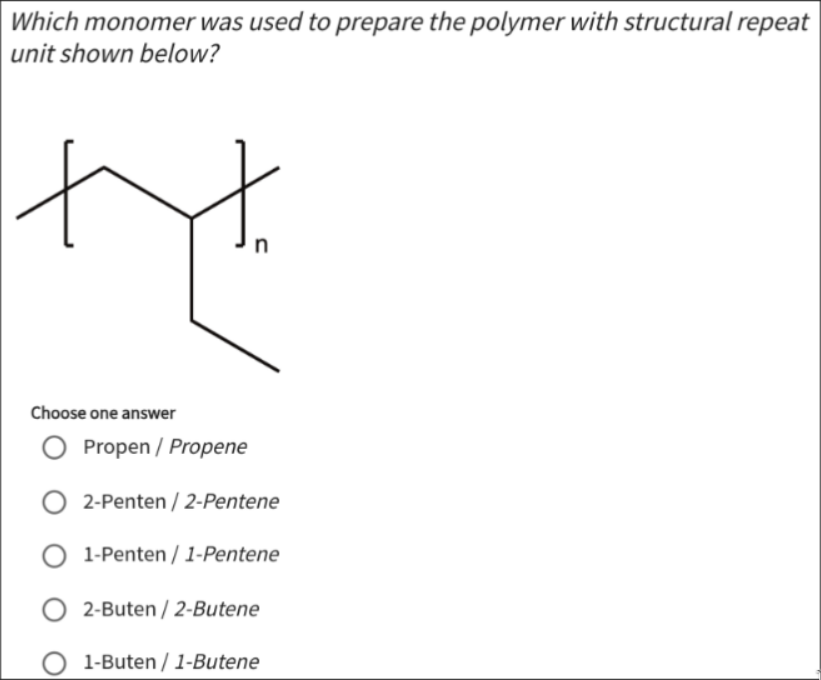

This problem requires you to identify the monomer by "reversing" the addition polymerization process.

* Identify the Polymer Backbone: In an addition polymer formed from an alkene, the main chain (or backbone) consists of the carbon atoms that were originally part of the double bond. In the given structure, —[CH(CH₂CH₃)—CH₂]—, the repeating two-carbon unit in the backbone is —CH—CH₂—.

    * Identify the Side Group: Look for any groups attached to the backbone carbons.

    * The first carbon (—CH—) has an ethyl group (—CH2​CH3​) attached to it.

    * The second carbon (—CH₂—) has only hydrogen atoms attached.

* Reconstruct the Monomer: To find the original monomer, re-form the double bond between the two backbone carbons and keep the side groups attached to their respective carbons.

This process gives you the molecule CH2​=CH−CH2​−CH3​, which is named 1-butene.